In [1]:
# importing the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# assigning the data to a dataframe

df = pd.read_csv("csv.csv")
df.head()

,Thrust(lb),RPM,Diameter,PITCH
0,0.035,1000.0,10.0,5.0
1,0.034,1000.0,10.0,5.0
2,0.034,1000.0,10.0,5.0
3,0.033,1000.0,10.0,5.0
4,0.032,1000.0,10.0,5.0


## Now we can proceed with the exploratory analysis of features 


Feature engineering is not necessary because there are only three parameters that determine the target feature(Thrust) in this data sample  

(array([5.975e+03, 3.817e+03, 2.073e+03, 1.337e+03, 9.490e+02, 7.060e+02,
        5.640e+02, 4.500e+02, 3.830e+02, 3.510e+02, 2.800e+02, 2.660e+02,
        2.050e+02, 1.860e+02, 1.450e+02, 1.630e+02, 1.020e+02, 1.150e+02,
        8.000e+01, 1.010e+02, 7.600e+01, 5.100e+01, 2.200e+01, 2.700e+01,
        2.300e+01, 7.000e+00, 2.000e+01, 7.000e+00, 3.000e+00, 1.100e+01]),
 array([-0.554     ,  0.48223333,  1.51846667,  2.5547    ,  3.59093333,
         4.62716667,  5.6634    ,  6.69963333,  7.73586667,  8.7721    ,
         9.80833333, 10.84456667, 11.8808    , 12.91703333, 13.95326667,
        14.9895    , 16.02573333, 17.06196667, 18.0982    , 19.13443333,
        20.17066667, 21.2069    , 22.24313333, 23.27936667, 24.3156    ,
        25.35183333, 26.38806667, 27.4243    , 28.46053333, 29.49676667,
        30.533     ]),
 <a list of 30 Patch objects>)

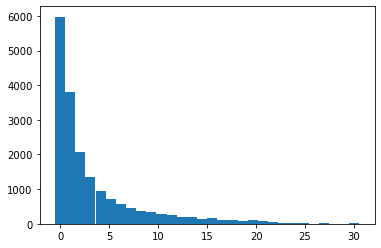

In [3]:
plt.hist(df['Thrust(lb)'].sort_values(ascending=False),bins=30)


In [4]:
#finding indexes that have wrong values of thrust or errors in it
indexes = df.index[df['Thrust(lb)'] <=0]

In [5]:
df.drop(indexes,axis=0,inplace=True)

In [6]:
df.index[df['Thrust(lb)']<=0]
# thus the errors are dropped

Int64Index([], dtype='int64')

In [7]:
df['Thrust(lb)'].describe()
# we can see that there are around 18k values of thrust after removing errors

count    17901.000000
mean         3.450861
std          4.795055
min          0.001000
25%          0.335000
50%          1.415000
75%          4.469000
max         30.533000
Name: Thrust(lb), dtype: float64

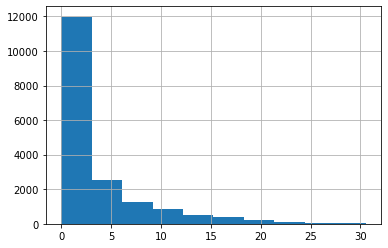

In [8]:
df['Thrust(lb)'].hist()
# most of the thrust values lie in the range of 0 to 10 lbs

In [9]:
df['Thrust(lb)'][(df['Thrust(lb)'] <= 10)].value_counts().sum()

16068

In [10]:
16068/17901.00
# around 90% of thrust values lie in the range of 0 to 10 lbs

0.8976034858387799

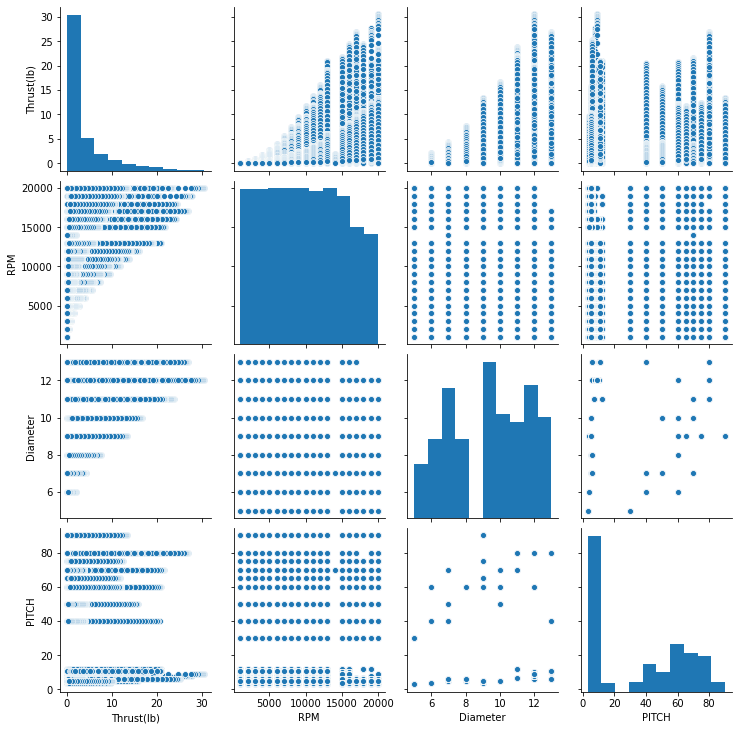

In [11]:
sns.pairplot(data=df)

In [11]:
df.corr()

,Thrust(lb),RPM,Diameter,PITCH
Thrust(lb),1.000000,0.559261,0.395628,-0.030259
RPM,0.559261,1.000000,-0.113408,0.017223
Diameter,0.395628,-0.113408,1.000000,0.047359
PITCH,-0.030259,0.017223,0.047359,1.000000


RPM has heighest correlation with the Thrust followed by Diameter 
and Pitch has negative correlation with it

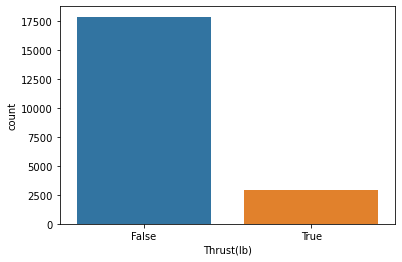

In [12]:
sns.countplot(df.isna()['Thrust(lb)'])

There are some missing values in the dataframe and we are going to drop them 

In [13]:
df.dropna(inplace=True)

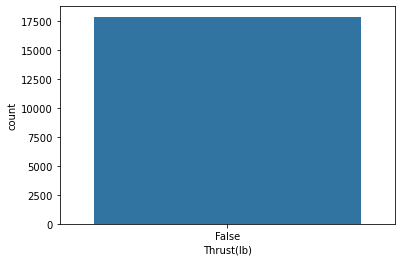

In [14]:
sns.countplot(df.isna()['Thrust(lb)'])

In [15]:
# assigning data for spliting into trianing and test data sets

X = df.drop('Thrust(lb)',axis=1).values
y = df['Thrust(lb)'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

we will limit the test data to 25% 

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
# scaling the features

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Creating and Training a model 

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Dropout

In [23]:
model_1 = Sequential()

In [24]:
# creating the model
model_1.add(Dense(3,activation='relu'))     # 'relu'(rectified linear unit) because of regression
model_1.add(Dense(9,activation='relu'))
model_1.add(Dropout(0.33))
model_1.add(Dense(6,activation='relu'))
model_1.add(Dropout(0.33))


model_1.add(Dense(1))

model_1.compile(optimizer='adam',loss='mean_absolute_error')
# adam optimizer works best and loss ='mse' because of regression analysis

now to choose the correct number of epochs we can use callbacks, Earlystopping is one of the callbacks widley used to moniter a parameter and stops the training accordingly 

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop_callback = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)

#here we are  going to monitor the validation loss 

In [35]:
model_1.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),
          callbacks=[early_stop_callback])

Epoch 1/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8656 - val_loss: 1.5400
Epoch 2/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8737 - val_loss: 1.5716
Epoch 3/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8336 - val_loss: 1.6216
Epoch 4/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8550 - val_loss: 1.6053
Epoch 5/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8593 - val_loss: 1.5795
Epoch 6/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8469 - val_loss: 1.5960
Epoch 7/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8566 - val_loss: 1.5564
Epoch 8/500
420/420 [==============================] - 1s 1ms/step - loss: 1.8175 - val_loss: 1.5841
Epoch 00008: early stopping


earlystopping callback has stopped the training at 18th epoch

In [36]:
predictions = model_1.predict(X_test)

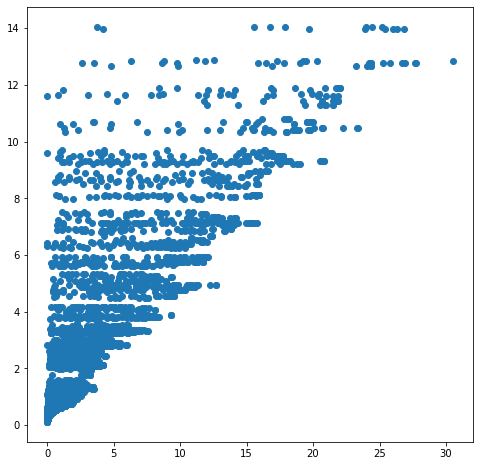

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predictions)

In [30]:
from sklearn.metrics import mean_absolute_error,explained_variance_score

In [38]:
mean_absolute_error(y_test,predictions)

1.5840847275782846

In [32]:
df['Thrust(lb)'].describe()

count    17901.000000
mean         3.450861
std          4.795055
min          0.001000
25%          0.335000
50%          1.415000
75%          4.469000
max         30.533000
Name: Thrust(lb), dtype: float64

we can see that model_1 is performing poorly

In [39]:
explained_variance_score(y_test,predictions)

0.6866409084365293

we got explained variance score of around 69% which isn't bad

In [40]:
model_1.save('thrust predicter 1.h5')

Text(0.5, 1.0, 'True thrust vs predictions')

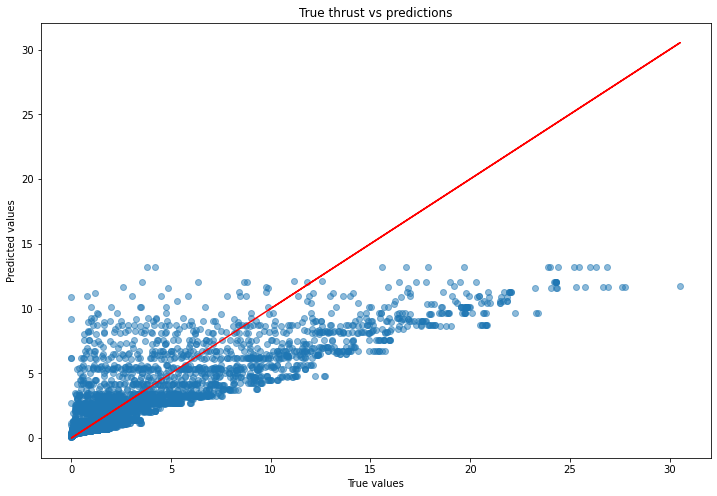

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions,cmap='coolwarm',alpha=0.5,marker='o')
plt.plot(y_test,y_test,'r')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True thrust vs predictions')

at low values the model performs good but further there is a deviation 

Trying an another model

In [42]:
model_2 = Sequential()

In [59]:
model_2.add(Dense(3,activation='relu'))     # 'relu'(rectified linear unit) because of regression
model_2.add(Dense(9,activation='relu'))
model_2.add(Dropout(0.33))
model_2.add(Dense(12,activation='relu'))

model_2.add(Dropout(0.33))

model_2.add(Dense(6,activation='relu'))
model_2.add(Dropout(0.33))


model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mean_absolute_error')
# adam optimizer works best and loss ='mse' because of regression analysis

In [60]:
model_2.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),
          callbacks=[early_stop_callback])

Epoch 1/500
420/420 [==============================] - 2s 3ms/step - loss: 3.2168 - val_loss: 2.9936
Epoch 2/500
420/420 [==============================] - 1s 2ms/step - loss: 3.0272 - val_loss: 2.9845
Epoch 3/500
420/420 [==============================] - 1s 2ms/step - loss: 3.0181 - val_loss: 2.9824
Epoch 4/500
420/420 [==============================] - 1s 2ms/step - loss: 3.0384 - val_loss: 2.9828
Epoch 5/500
420/420 [==============================] - 1s 2ms/step - loss: 3.0417 - val_loss: 2.9821
Epoch 6/500
420/420 [==============================] - 1s 2ms/step - loss: 3.0479 - val_loss: 2.9822
Epoch 7/500
420/420 [==============================] - 1s 2ms/step - loss: 2.9263 - val_loss: 2.9824
Epoch 8/500
420/420 [==============================] - 1s 2ms/step - loss: 2.9849 - val_loss: 2.9824
Epoch 9/500
420/420 [==============================] - 1s 2ms/step - loss: 2.9957 - val_loss: 2.9826
Epoch 10/500
420/420 [==============================] - 1s 2ms/step - loss: 3.0028 - val_lo

In [61]:
predictions2= model_2.predict(X_test)

In [62]:
mean_absolute_error(y_test,predictions2)

2.9833486913445806

Further models are devastating so I am going to use my 1st model

                                   ## Thank you  ##